# Non-Clifford CNOT-Dihedral Interleaved Randomized Benchmarking 
# of a CX gate

In [1]:
#Import general libraries (needed for functions)
import numpy as np
import matplotlib.pyplot as plt
from IPython import display

#Import Qiskit classes
import qiskit
from qiskit.providers.aer.noise import NoiseModel, errors
from qiskit.providers.aer.noise.errors.standard_errors import depolarizing_error, thermal_relaxation_error
from qiskit.quantum_info.operators import Operator

#Import the RB Functions
import qiskit.ignis.verification.randomized_benchmarking as rb

#from examples import CS_utils

In [2]:
#Number of qubits
nQ = 2
#There are 2 qubits: Q0,Q1.
#Number of seeds (random sequences)
nseeds = 10
#Number of Cliffords in the sequence 
nCliffs = [1, 10, 25, 50, 100, 150]
#2Q RB on Q0,Q1 
rb_pattern = [[0,1]]
# Non-Clifford RB
group_gates = 'CNOT-Dihedral'

### Interleaved RB with a CX gate 

Defining a CS gate using an operator.

In [3]:
rb_opts = {}
rb_opts['length_vector'] = nCliffs
rb_opts['nseeds'] = nseeds
rb_opts['rb_pattern'] = rb_pattern
rb_opts['group_gates'] = group_gates
rb_opts['align_cliffs'] = True

CS01 = rb.dihedral.CNOTDihedral(2)
CS01.phase(1, 0)
CS01.phase(1, 1)
CS01.cnot(0, 1)
CS01.phase(7, 1)
CS01.cnot(0, 1)

CX01 = rb.dihedral.CNOTDihedral(2)
CX01.cnot(0, 1)

cs = Operator([[1, 0, 0, 0],
               [0, 1, 0, 0],
               [0, 0, 1, 0],
               [0, 0, 0, 1j]])

## interleaved CX gate
rb_opts['interleaved_gates'] = [(CX01, [('usr_gate_cx', 0, 1)])]

# constant circuits from experiment data
import pickle
with open('cx01_rb_circs_n10_length6_sim.pk', 'rb') as fp:
    rb_circs_tuple = pickle.load(fp)    
rb_cnotdihedral_Z_circs, rb_cnotdihedral_X_circs, rb_cnotdihedral_interleaved_Z_circs, \
rb_cnotdihedral_interleaved_X_circs = rb_circs_tuple
#rb_cnotdihedral_Z_circs, xdata, rb_cnotdihedral_X_circs, rb_cnotdihedral_interleaved_Z_circs, \
#rb_cnotdihedral_interleaved_X_circs = rb.randomized_benchmarking_seq(**rb_opts)

In [4]:
print (rb_cnotdihedral_Z_circs[0][0])

      ┌────────┐┌───┐                                   ░  ░               »
qr_0: ┤ U1(pi) ├┤ X ├──■────────────────■───────────────░──░───────────────»
      └─┬───┬──┘└───┘┌─┴─┐┌──────────┐┌─┴─┐┌──────────┐ ░  ░ ┌────────────┐»
qr_1: ──┤ X ├────────┤ X ├┤ U1(pi/2) ├┤ X ├┤ U1(pi/4) ├─░──░─┤ U1(5.4978) ├»
        └───┘        └───┘└──────────┘└───┘└──────────┘ ░  ░ └────────────┘»
cr_0: ═════════════════════════════════════════════════════════════════════»
                                                                           »
cr_1: ═════════════════════════════════════════════════════════════════════»
                                                                           »
«                              ┌───┐┌────────┐┌─┐
«qr_0: ──■──────────────────■──┤ X ├┤ U1(pi) ├┤M├
«      ┌─┴─┐┌────────────┐┌─┴─┐├───┤└──┬─┬───┘└╥┘
«qr_1: ┤ X ├┤ U1(4.7124) ├┤ X ├┤ X ├───┤M├─────╫─
«      └───┘└────────────┘└───┘└───┘   └╥┘     ║ 
«cr_0: ═════════════════════════════════╬══════╩═
«      

In [5]:
print (rb_cnotdihedral_interleaved_Z_circs[0][0])

      ┌────────┐┌───┐                                   ░ ┌─────┐ ░  ░ »
qr_0: ┤ U1(pi) ├┤ X ├──■────────────────■───────────────░─┤0    ├─░──░─»
      └─┬───┬──┘└───┘┌─┴─┐┌──────────┐┌─┴─┐┌──────────┐ ░ │  cx │ ░  ░ »
qr_1: ──┤ X ├────────┤ X ├┤ U1(pi/2) ├┤ X ├┤ U1(pi/4) ├─░─┤1    ├─░──░─»
        └───┘        └───┘└──────────┘└───┘└──────────┘ ░ └─────┘ ░  ░ »
cr_0: ═════════════════════════════════════════════════════════════════»
                                                                       »
cr_1: ═════════════════════════════════════════════════════════════════»
                                                                       »
«                         ┌───┐ ┌────────┐ ┌─┐   
«qr_0: ────────────────■──┤ X ├─┤ U1(pi) ├─┤M├───
«      ┌────────────┐┌─┴─┐├───┤┌┴────────┴┐└╥┘┌─┐
«qr_1: ┤ U1(4.7124) ├┤ X ├┤ X ├┤ U1(pi/4) ├─╫─┤M├
«      └────────────┘└───┘└───┘└──────────┘ ║ └╥┘
«cr_0: ═════════════════════════════════════╩══╬═
«                                          

In [6]:
print (rb_cnotdihedral_X_circs[0][0])

      ┌───┐ ░ ┌────────┐┌───┐                                   ░  ░ »
qr_0: ┤ H ├─░─┤ U1(pi) ├┤ X ├──■────────────────■───────────────░──░─»
      ├───┤ ░ └─┬───┬──┘└───┘┌─┴─┐┌──────────┐┌─┴─┐┌──────────┐ ░  ░ »
qr_1: ┤ H ├─░───┤ X ├────────┤ X ├┤ U1(pi/2) ├┤ X ├┤ U1(pi/4) ├─░──░─»
      └───┘ ░   └───┘        └───┘└──────────┘└───┘└──────────┘ ░  ░ »
cr_0: ═══════════════════════════════════════════════════════════════»
                                                                     »
cr_1: ═══════════════════════════════════════════════════════════════»
                                                                     »
«                                            ┌───┐┌────────┐  ░  ┌───┐┌─┐
«qr_0: ────────────────■──────────────────■──┤ X ├┤ U1(pi) ├──░──┤ H ├┤M├
«      ┌────────────┐┌─┴─┐┌────────────┐┌─┴─┐├───┤└───░────┘┌───┐└┬─┬┘└╥┘
«qr_1: ┤ U1(5.4978) ├┤ X ├┤ U1(4.7124) ├┤ X ├┤ X ├────░─────┤ H ├─┤M├──╫─
«      └────────────┘└───┘└────────────┘└───┘└───┘    ░     └───┘

In [7]:
print (rb_cnotdihedral_interleaved_X_circs[0][0])

      ┌───┐ ░ ┌────────┐┌───┐                                   ░ ┌─────┐ ░  ░ »
qr_0: ┤ H ├─░─┤ U1(pi) ├┤ X ├──■────────────────■───────────────░─┤0    ├─░──░─»
      ├───┤ ░ └─┬───┬──┘└───┘┌─┴─┐┌──────────┐┌─┴─┐┌──────────┐ ░ │  cx │ ░  ░ »
qr_1: ┤ H ├─░───┤ X ├────────┤ X ├┤ U1(pi/2) ├┤ X ├┤ U1(pi/4) ├─░─┤1    ├─░──░─»
      └───┘ ░   └───┘        └───┘└──────────┘└───┘└──────────┘ ░ └─────┘ ░  ░ »
cr_0: ═════════════════════════════════════════════════════════════════════════»
                                                                               »
cr_1: ═════════════════════════════════════════════════════════════════════════»
                                                                               »
«                         ┌───┐ ┌────────┐  ░ ┌───┐┌─┐   
«qr_0: ────────────────■──┤ X ├─┤ U1(pi) ├──░─┤ H ├┤M├───
«      ┌────────────┐┌─┴─┐├───┤┌┴────────┴┐ ░ ├───┤└╥┘┌─┐
«qr_1: ┤ U1(4.7124) ├┤ X ├┤ X ├┤ U1(pi/4) ├─░─┤ H ├─╫─┤M├
«      └────────────┘└───┘└───┘└───────

### Add a depolarize noise to the CS gate

In [8]:
cs = Operator([[1, 0, 0, 0],
               [0, 1, 0, 0],
               [0, 0, 1, 0],
               [0, 0, 0, 1j]])

### Add depolarizing error to "cs" gate

p1Qu2 = 0.00055
p1Qu3 = 0.001
p2Qcx = 0.0146/0.75
p2Qcs = 0.0146/0.75

# Construct the error
cs_error = errors.depolarizing_error(p2Qcs, 2)
cx_error = errors.depolarizing_error(p2Qcx, 2)
print ("Depolarizing errors on u2,u3,cs,cx gates respectively:", p1Qu2,p1Qu3, p2Qcx, p2Qcs)

# Build the noise model by adding the error to the "cs" gate
noise_model = NoiseModel()
noise_model.add_all_qubit_quantum_error(depolarizing_error(p1Qu2, 1), 'u2')
noise_model.add_all_qubit_quantum_error(depolarizing_error(p1Qu3, 1), 'u3')
noise_model.add_all_qubit_quantum_error(depolarizing_error(p2Qcx, 2), 'cx')
#noise_model.add_all_qubit_quantum_error(cs_error, 'cs')
noise_model.add_all_qubit_quantum_error(cx_error, 'usr_gate_cx')
print (noise_model)

noise_model.add_basis_gates(['unitary'])
basis_gates = noise_model.basis_gates
print("basis_gates:", basis_gates)

Depolarizing errors on u2,u3,cs,cx gates respectively: 0.00055 0.001 0.019466666666666667 0.019466666666666667
NoiseModel:
  Basis gates: ['cx', 'id', 'u2', 'u3']
  Instructions with noise: ['cx', 'u2', 'usr_gate_cx', 'u3']
  All-qubits errors: ['u2', 'u3', 'cx', 'usr_gate_cx']
basis_gates: ['cx', 'id', 'u2', 'u3', 'unitary']


In [9]:
#Create a new circuit without the measurement
qc = qiskit.QuantumCircuit(*rb_cnotdihedral_Z_circs[0][-1].qregs, *rb_cnotdihedral_Z_circs[0][-1].cregs)
for i in rb_cnotdihedral_Z_circs[0][-1][0:-nQ]:
    qc.data.append(i)

#The Unitary is an identity (with a global phase)
backend = qiskit.Aer.get_backend('unitary_simulator')
#basis_gates = ['u1', 'u2', 'u3', 'cx'] # use U,CX for now
job = qiskit.execute(qc, backend=backend, basis_gates=basis_gates)
print(np.around(job.result().get_unitary(), 3))

[[-0.-1.j -0.+0.j  0.+0.j  0.-0.j]
 [-0.+0.j -0.-1.j -0.+0.j  0.+0.j]
 [ 0.-0.j -0.-0.j -0.-1.j  0.+0.j]
 [ 0.+0.j  0.-0.j  0.-0.j -0.-1.j]]


In [10]:
#Create a new circuit without the measurement
qc = qiskit.QuantumCircuit(*rb_cnotdihedral_X_circs[0][-1].qregs, *rb_cnotdihedral_X_circs[0][-1].cregs)
for i in rb_cnotdihedral_X_circs[0][-1][0:-nQ]:
    qc.data.append(i)

#The Unitary is an identity (with a global phase)
backend = qiskit.Aer.get_backend('unitary_simulator')
#basis_gates = ['u1', 'u2', 'u3', 'cx'] # use U,CX for now
job = qiskit.execute(qc, backend=backend, basis_gates=basis_gates)
print(np.around(job.result().get_unitary(), 3))

[[-0.-1.j  0.-0.j  0.-0.j  0.-0.j]
 [ 0.-0.j -0.-1.j  0.-0.j  0.-0.j]
 [ 0.-0.j  0.-0.j -0.-1.j  0.-0.j]
 [ 0.-0.j  0.-0.j  0.-0.j -0.-1.j]]


In [11]:
#Create a new circuit without the measurement
qc = qiskit.QuantumCircuit(*rb_cnotdihedral_interleaved_Z_circs[0][-1].qregs, *rb_cnotdihedral_interleaved_Z_circs[0][-1].cregs)
for i in rb_cnotdihedral_interleaved_Z_circs[0][-1][0:-nQ]:
    qc.data.append(i)

#The Unitary is an identity (with a global phase)
backend = qiskit.Aer.get_backend('unitary_simulator')
#basis_gates = ['u1', 'u2', 'u3', 'cx'] # use U,CX for now
job = qiskit.execute(qc, backend=backend, basis_gates=basis_gates)
print(np.around(job.result().get_unitary(), 3))

[[ 1.-0.j -0.+0.j -0.-0.j  0.-0.j]
 [ 0.+0.j  1.-0.j -0.-0.j -0.-0.j]
 [ 0.-0.j  0.-0.j  1.-0.j -0.-0.j]
 [-0.-0.j  0.-0.j  0.-0.j  1.-0.j]]


In [12]:
#Create a new circuit without the measurement
qc = qiskit.QuantumCircuit(*rb_cnotdihedral_interleaved_X_circs[0][-1].qregs, *rb_cnotdihedral_interleaved_X_circs[0][-1].cregs)
for i in rb_cnotdihedral_interleaved_X_circs[0][-1][0:-nQ]:
    qc.data.append(i)

#The Unitary is an identity (with a global phase)
backend = qiskit.Aer.get_backend('unitary_simulator')
#basis_gates = ['u1', 'u2', 'u3', 'cx'] # use U,CX for now
job = qiskit.execute(qc, backend=backend, basis_gates=basis_gates)
print(np.around(job.result().get_unitary(), 3))

[[1.-0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 1.-0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 1.-0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.-0.j]]


### Execute the RB sequences

In [13]:
#CNOT-Dihedral RB X circuits
backend = qiskit.Aer.get_backend('qasm_simulator')
#basis_gates = ['u1','u2','u3','cx'] # use U,CX for now
shots = 200
cnotdihedral_X_result_list = []
cnotdihedral_X_qobj_list = []
import time
for rb_seed,rb_circ_seed in enumerate(rb_cnotdihedral_X_circs):
    print('Compiling seed %d'%rb_seed)
    new_rb_circ_seed = qiskit.compiler.transpile(rb_circ_seed, basis_gates=basis_gates)
    qobj = qiskit.compiler.assemble(new_rb_circ_seed, shots=shots)
    print('Simulating seed %d'%rb_seed)
    job = backend.run(qobj, noise_model=noise_model, backend_options={'max_parallel_experiments': 0})
    cnotdihedral_X_result_list.append(job.result())
    cnotdihedral_X_qobj_list.append(qobj)    
print("Finished Simulating CNOT-Dihedral X Circuits")

Compiling seed 0
Simulating seed 0
Compiling seed 1
Simulating seed 1
Compiling seed 2
Simulating seed 2
Compiling seed 3
Simulating seed 3
Compiling seed 4
Simulating seed 4
Compiling seed 5
Simulating seed 5
Compiling seed 6
Simulating seed 6
Compiling seed 7
Simulating seed 7
Compiling seed 8
Simulating seed 8
Compiling seed 9
Simulating seed 9
Finished Simulating CNOT-Dihedral X Circuits


In [14]:
#CNOT-Dihedral interleaved RB X circuits
backend = qiskit.Aer.get_backend('qasm_simulator')
#basis_gates = ['u1','u2','u3','cx'] # use U,CX for now
shots = 200
cnotdihedral_interleaved_X_result_list = []
cnotdihedral_interleaved_X_qobj_list = []
import time
for rb_seed,rb_circ_seed in enumerate(rb_cnotdihedral_interleaved_X_circs):
    print('Compiling seed %d'%rb_seed)
    new_rb_circ_seed = qiskit.compiler.transpile(rb_circ_seed, basis_gates=basis_gates)
    qobj = qiskit.compiler.assemble(new_rb_circ_seed, shots=shots)
    print('Simulating seed %d'%rb_seed)
    job = backend.run(qobj, noise_model=noise_model, backend_options={'max_parallel_experiments': 0})
    cnotdihedral_interleaved_X_result_list.append(job.result())
    cnotdihedral_interleaved_X_qobj_list.append(qobj)    
print("Finished Simulating CNOT-Dihedral Interleaved X Circuits")

Compiling seed 0
Simulating seed 0
Compiling seed 1
Simulating seed 1
Compiling seed 2
Simulating seed 2
Compiling seed 3
Simulating seed 3
Compiling seed 4
Simulating seed 4
Compiling seed 5
Simulating seed 5
Compiling seed 6
Simulating seed 6
Compiling seed 7
Simulating seed 7
Compiling seed 8
Simulating seed 8
Compiling seed 9
Simulating seed 9
Finished Simulating CNOT-Dihedral Interleaved X Circuits


In [15]:
#CNOT-Dihedral RB Z circuits
backend = qiskit.Aer.get_backend('qasm_simulator')
#basis_gates = ['u1','u2','u3','cx'] # use U,CX for now
shots = 200
cnotdihedral_Z_result_list = []
cnotdihedral_Z_qobj_list = []
import time
for rb_seed,rb_circ_seed in enumerate(rb_cnotdihedral_Z_circs):
    print('Compiling seed %d'%rb_seed)
    new_rb_circ_seed = qiskit.compiler.transpile(rb_circ_seed, basis_gates=basis_gates)
    qobj = qiskit.compiler.assemble(new_rb_circ_seed, shots=shots)
    print('Simulating seed %d'%rb_seed)
    job = backend.run(qobj, noise_model=noise_model, backend_options={'max_parallel_experiments': 0})
    cnotdihedral_Z_result_list.append(job.result())
    cnotdihedral_Z_qobj_list.append(qobj)    
print("Finished Simulating CNOT-Dihedral Z Circuits")

Compiling seed 0
Simulating seed 0
Compiling seed 1
Simulating seed 1
Compiling seed 2
Simulating seed 2
Compiling seed 3
Simulating seed 3
Compiling seed 4
Simulating seed 4
Compiling seed 5
Simulating seed 5
Compiling seed 6
Simulating seed 6
Compiling seed 7
Simulating seed 7
Compiling seed 8
Simulating seed 8
Compiling seed 9
Simulating seed 9
Finished Simulating CNOT-Dihedral Z Circuits


In [16]:
#CNOT-Dihedral inteleaved RB Z circuits
backend = qiskit.Aer.get_backend('qasm_simulator')
#basis_gates = ['u1','u2','u3','cx'] # use U,CX for now
shots = 200
cnotdihedral_interleaved_Z_result_list = []
cnotdihedral_interleaved_Z_qobj_list = []
import time
for rb_seed,rb_circ_seed in enumerate(rb_cnotdihedral_interleaved_Z_circs):
    print('Compiling seed %d'%rb_seed)
    new_rb_circ_seed = qiskit.compiler.transpile(rb_circ_seed, basis_gates=basis_gates)
    qobj = qiskit.compiler.assemble(new_rb_circ_seed, shots=shots)
    print('Simulating seed %d'%rb_seed)
    job = backend.run(qobj, noise_model=noise_model, backend_options={'max_parallel_experiments': 0})
    cnotdihedral_interleaved_Z_result_list.append(job.result())
    cnotdihedral_interleaved_Z_qobj_list.append(qobj)    
print("Finished Simulating CNOT-Dihedral Interleaved Z Circuits")

Compiling seed 0
Simulating seed 0
Compiling seed 1
Simulating seed 1
Compiling seed 2
Simulating seed 2
Compiling seed 3
Simulating seed 3
Compiling seed 4
Simulating seed 4
Compiling seed 5
Simulating seed 5
Compiling seed 6
Simulating seed 6
Compiling seed 7
Simulating seed 7
Compiling seed 8
Simulating seed 8
Compiling seed 9
Simulating seed 9
Finished Simulating CNOT-Dihedral Interleaved Z Circuits


### Fit the results

In [17]:
#Create the cnot-dihedral Z and X RB fitters
xdata = [[1, 10, 25, 50, 100, 150]]
cnotdihedral_Z_rb_fit = rb.RBFitter(cnotdihedral_Z_result_list, xdata, rb_opts['rb_pattern'])
cnotdihedral_X_rb_fit = rb.RBFitter(cnotdihedral_X_result_list, xdata, rb_opts['rb_pattern'])

In [18]:
# Print the Z circuits fitter parameters
for patt_ind, pattern in enumerate(rb_pattern):
    print ('pattern:', patt_ind, '-', len(pattern), 'qubit cnot-dihedral RB of Z circuits:', cnotdihedral_Z_rb_fit.fit[patt_ind])

pattern: 0 - 2 qubit cnot-dihedral RB of Z circuits: {'params': array([0.72773011, 0.9623461 , 0.26551161]), 'params_err': array([0.00531009, 0.00089301, 0.00376501]), 'epc': 0.028240425501817767, 'epc_err': 0.0006959613525831267}


In [19]:
# Print the X circuits fitter parameters
for patt_ind, pattern in enumerate(rb_pattern):
    print ('pattern:', patt_ind, '-', len(pattern), 'qubit cnot-dihedral RB of X circuits:', cnotdihedral_X_rb_fit.fit[patt_ind])

pattern: 0 - 2 qubit cnot-dihedral RB of X circuits: {'params': array([0.72160733, 0.96054803, 0.26976146]), 'params_err': array([0.00647225, 0.0010292 , 0.0053056 ]), 'epc': 0.029588974964169457, 'epc_err': 0.0008036046731394405}


In [20]:
#Create the cnot-dihedral intelreaved Z and X RB fitters
cnotdihedral_interleaved_Z_rb_fit = rb.RBFitter(cnotdihedral_interleaved_Z_result_list, xdata, rb_opts['rb_pattern'])
cnotdihedral_interleaved_X_rb_fit = rb.RBFitter(cnotdihedral_interleaved_X_result_list, xdata, rb_opts['rb_pattern'])

In [21]:
# Print the interleaved Z circuits fitter parameters
for patt_ind, pattern in enumerate(rb_pattern):
    print ('pattern:', patt_ind, '-', len(pattern), 'qubit cnot-dihedral RB of interleaved Z circuits:', cnotdihedral_interleaved_Z_rb_fit.fit[patt_ind])

pattern: 0 - 2 qubit cnot-dihedral RB of interleaved Z circuits: {'params': array([0.74484978, 0.94396235, 0.24808639]), 'params_err': array([0.00427262, 0.00076448, 0.00249822]), 'epc': 0.04202824122377233, 'epc_err': 0.0006073959127079564}


In [22]:
# Print the interleaved X circuits fitter parameters
for patt_ind, pattern in enumerate(rb_pattern):
    print ('pattern:', patt_ind, '-', len(pattern), 'qubit cnot-dihedral RB of interleaved X circuits:', cnotdihedral_interleaved_X_rb_fit.fit[patt_ind])

pattern: 0 - 2 qubit cnot-dihedral RB of interleaved X circuits: {'params': array([0.72626162, 0.94284713, 0.25874936]), 'params_err': array([0.00726711, 0.0017309 , 0.00401034]), 'epc': 0.04286464962381498, 'epc_err': 0.001376868105679045}


In [23]:
#Calculate the joint fitter
joint_rb_fit = rb.CNOTDihedralRBFitter(cnotdihedral_Z_result_list, cnotdihedral_X_result_list, xdata, rb_opts['rb_pattern'])
joint_int_rb_fit = rb.CNOTDihedralRBFitter(cnotdihedral_interleaved_Z_result_list, cnotdihedral_interleaved_X_result_list, xdata, rb_opts['rb_pattern'])

### Calculate the fidelity

In [24]:
#Print the joint fitter parameters
for patt_ind, pattern in enumerate(rb_pattern):
    print ('pattern:', patt_ind, '-', len(pattern), 'qubit cnot-dihedral RB:', joint_rb_fit.fit_cnotdihedral[patt_ind])
#Print the joint interleaved parameters
for patt_ind, pattern in enumerate(rb_pattern):
    print ('pattern:', patt_ind, '-', len(pattern), 'qubit cnot-dihedral interleaved RB:', joint_int_rb_fit.fit_cnotdihedral[patt_ind])

pattern: 0 - 2 qubit cnot-dihedral RB: {'alpha': 0.9609076465710679, 'alpha_err': 0.0008770394537322465, 'epg_est': 0.029319265071699102, 'epg_est_err': 0.0006845398646232294}
pattern: 0 - 2 qubit cnot-dihedral interleaved RB: {'alpha': 0.9430701760749247, 'alpha_err': 0.0014775639358350122, 'epg_est': 0.042697367943806463, 'epg_est_err': 0.0011750694486899111}


In [25]:
#Expected error of the interleaved cs gate
alpha = joint_rb_fit.fit_cnotdihedral[0]['alpha']
alpha_c = joint_int_rb_fit.fit_cnotdihedral[0]['alpha']
alpha_err = joint_rb_fit.fit_cnotdihedral[0]['alpha_err']
alpha_c_err = joint_rb_fit.fit_cnotdihedral[0]['alpha_err']

nrb = 2 ** nQ
r_est = (nrb - 1) * (1 - alpha_c / alpha) / nrb

alpha_err_sq = (alpha_err / alpha) * (alpha_err / alpha)
alpha_c_err_sq = (alpha_c_err / alpha_c) * (alpha_c_err / alpha_c)
r_est_err = ((nrb - 1) / nrb) * (alpha_c / alpha) * (np.sqrt(alpha_err_sq + alpha_c_err_sq))

print ("Estimated gate error: %f (%f)" %(r_est, r_est_err))
print('RB fidelity = %.5f' % (1 - r_est))

Estimated gate error: 0.013922 (0.000959)
RB fidelity = 0.98608


### Plot the results

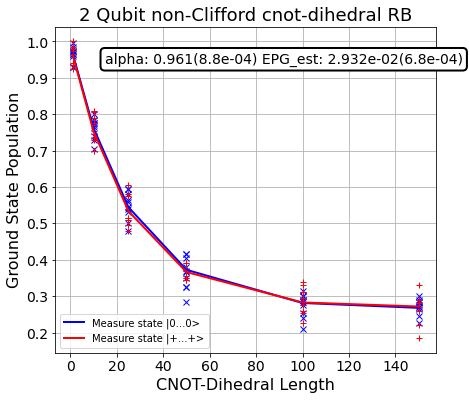

In [26]:
#Plot the joint RB data
plt.figure(figsize=(15, 6))

for i in range(1):
    ax = plt.subplot(1, 2, i+1)
    pattern_ind = i

    # Plot the essence by calling plot_rb_data
    joint_rb_fit.plot_rb_data(pattern_ind, ax=ax, add_label=True, show_plt=False)

    # Add title and label
    ax.set_title('%d Qubit non-Clifford cnot-dihedral RB'%(len(rb_opts['rb_pattern'][i])), fontsize=18)

plt.show()

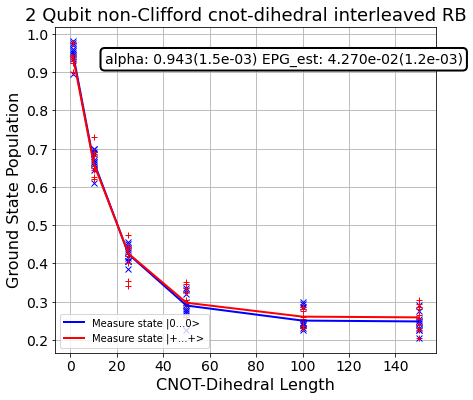

In [27]:
#Plot the joint interleaved RB data
plt.figure(figsize=(15, 6))

for i in range(1):
    ax = plt.subplot(1, 2, i+1)
    pattern_ind = i

    # Plot the essence by calling plot_rb_data
    joint_int_rb_fit.plot_rb_data(pattern_ind, ax=ax, add_label=True, show_plt=False)

    # Add title and label
    ax.set_title('%d Qubit non-Clifford cnot-dihedral interleaved RB'%(len(rb_opts['rb_pattern'][i])), fontsize=18)

plt.show()

### Coherence limit

In [53]:
noise_model2 = NoiseModel()

#Add T1/T2 noise to the simulation
t1 = 63.9
t2 = 87.3
gate1Qu2 = 0.035 
gate1Qu3 = 0.071 
gate2Qcx = 0.384
gate2Qcxint = 0.1848
gate2Qcs = 0.2203
#cx: 2 x 0.035 + 2 x 256 / 4.5e9 / 1e6 = 0.07111 + 0.1137  = 0.1848
#cs: 3 x 0.035 + 2 x 256 / 4.5e9 / 1e6 = 0.10666 + 0.1137 = 0.2203

cx_error = errors.thermal_relaxation_error(t1,t2,gate2Qcxint).tensor(thermal_relaxation_error(t1,t2,gate2Qcxint))
#cs_error = errors.thermal_relaxation_error(t1,t2,gate2Qcs).tensor(thermal_relaxation_error(t1,t2,gate2Qcs))
noise_model2.add_all_qubit_quantum_error(thermal_relaxation_error(t1,t2,gate1Qu2), 'u2')
noise_model2.add_all_qubit_quantum_error(thermal_relaxation_error(t1,t2,2*gate1Qu3), 'u3')
noise_model2.add_all_qubit_quantum_error(
    thermal_relaxation_error(t1,t2,gate2Qcx).tensor(thermal_relaxation_error(t1,t2,gate2Qcx)), 'cx')

noise_model2.add_all_qubit_quantum_error(cx_error, 'usr_gate_cx')
#noise_model2.add_all_qubit_quantum_error(cs_error, 'cs')
print (noise_model2)

noise_model2.add_basis_gates(['unitary'])
basis_gates = noise_model2.basis_gates
print("basis_gates:", basis_gates)

NoiseModel:
  Basis gates: ['cx', 'id', 'u2', 'u3']
  Instructions with noise: ['cx', 'u2', 'usr_gate_cx', 'u3']
  All-qubits errors: ['u2', 'u3', 'cx', 'usr_gate_cx']
basis_gates: ['cx', 'id', 'u2', 'u3', 'unitary']


In [58]:
u2_error = rb.rb_utils.coherence_limit(1,[t1],[t2],gate1Qu2)
u3_error = rb.rb_utils.coherence_limit(1,[t1],[t2],2*gate1Qu3)
epg_2qcx = rb.rb_utils.coherence_limit(2,[t1,t1],[t2,t2],gate2Qcx)
epg_2qcxint = rb.rb_utils.coherence_limit(2,[t1,t1],[t2,t2],gate2Qcxint)
epg_2qcs = rb.rb_utils.coherence_limit(2,[t1,t1],[t2,t2],gate2Qcs)
print ("u2 error by conherence limit", u2_error)
print ("u3 error by conherence limit", u3_error)
print ("cx error by conherence limit", epg_2qcx)
print ("usr_gate_cx error by conherence limit", epg_2qcxint)
print ("cs error by conherence limit", epg_2qcs)

u2 error by conherence limit 0.00022487548340063834
u3 error by conherence limit 0.0009117101098770064
cx error by conherence limit 0.005896813665684952
usr_gate_cx error by conherence limit 0.0028442834080155688
cs error by conherence limit 0.0033892986420398508
